In [1]:
!pip install geopy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopy import distance
sys.path.append('../scripts')
from helpers import Helper

Defaulting to user installation because normal site-packages is not writeable


Exploring Orders completed data

In [2]:
df_orders = pd.read_csv('../data/nb.csv')

In [3]:
# df_orders.head()

In [4]:
df_orders.isna().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

In [5]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [6]:
df_orders.describe()

,Trip ID
count,5.360200e+05
mean,9.910221e+05
std,3.456364e+05
min,3.919960e+05
25%,6.935610e+05
50%,9.910085e+05
75%,1.281570e+06
max,1.637709e+06


In [7]:
df_orders.shape

(536020, 5)

Lets rename the column names to make it easier when storing to a database later

In [8]:
df_orders = df_orders.rename(columns={'Trip ID': 'trip_id', 
                    'Trip Origin': 'trip_origin', 
                    'Trip Destination': 'trip_destination', 
                    'Trip Start Time': 'trip_start_time', 
                    'Trip End Time': 'trip_end_time',})
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   trip_id           536020 non-null  int64 
 1   trip_origin       536020 non-null  object
 2   trip_destination  536020 non-null  object
 3   trip_start_time   534369 non-null  object
 4   trip_end_time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


Separate the latitude and longitude from trip_origin and trip_destination columns

In [9]:
df_orders['trip_origin_lat'] = df_orders['trip_origin'].apply(lambda x: str(x).split(',')[0])
df_orders['trip_origin_long'] = df_orders['trip_origin'].apply(lambda y: str(y).split(',')[1])

In [10]:
# df_orders.head()
df_orders['trip_destn_lat'] = df_orders['trip_destination'].apply(lambda x: str(x).split(',')[0])
df_orders['trip_destn_long'] = df_orders['trip_destination'].apply(lambda y: str(y).split(',')[1])

In [11]:
df_orders.head(2)

,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586


Find the distances between trip origin and trip destination

In [12]:
df_orders['trip_distance']=df_orders.apply(lambda x:distance.distance((x['trip_origin_lat'],x['trip_origin_long']), 
(x['trip_destn_lat'],x['trip_destn_long'])).km,axis=1)

In [13]:
df_orders.head()

,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307,16.123451
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586,1.884305
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679399999999,3.3388976,6.508324099999999,3.3590397,13.822393
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,6.572757200000001,3.3677082,6.584881099999999,3.3614073,1.511034
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319


In [14]:
df_orders.isnull().sum()

trip_id                0
trip_origin            0
trip_destination       0
trip_start_time     1651
trip_end_time          1
trip_origin_lat        0
trip_origin_long       0
trip_destn_lat         0
trip_destn_long        0
trip_distance          0
dtype: int64

fill the 1 trip_end_time row with null value with the start time as this probably means the delivery was not fulfilled.


In [15]:
df_orders['trip_end_time'].fillna(df_orders[df_orders['trip_end_time'].isna()]['trip_start_time'],inplace=True)

In [16]:
df_orders.isnull().sum()

trip_id                0
trip_origin            0
trip_destination       0
trip_start_time     1651
trip_end_time          0
trip_origin_lat        0
trip_origin_long       0
trip_destn_lat         0
trip_destn_long        0
trip_distance          0
dtype: int64

In [17]:
def convert_to_datetype(df,columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column])
    return df


In [18]:
df_orders = convert_to_datetype(df_orders,['trip_start_time','trip_end_time'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   trip_id           536020 non-null  int64         
 1   trip_origin       536020 non-null  object        
 2   trip_destination  536020 non-null  object        
 3   trip_start_time   534369 non-null  datetime64[ns]
 4   trip_end_time     536020 non-null  datetime64[ns]
 5   trip_origin_lat   536020 non-null  object        
 6   trip_origin_long  536020 non-null  object        
 7   trip_destn_lat    536020 non-null  object        
 8   trip_destn_long   536020 non-null  object        
 9   trip_distance     536020 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 40.9+ MB


In [19]:
from datetime import datetime,timedelta,date
df_orders['trip_duration'] = (df_orders['trip_end_time'] - df_orders['trip_start_time']).astype('timedelta64[m]')

In [20]:
df_orders.tail()

,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance,trip_duration
536015,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59,6.448218499999999,3.4772075,6.437787399999999,3.481670199999999,1.254752,27.0
536016,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49,6.442320899999999,3.4736868,6.436589333407897,3.5559738188407835,9.124781,55.0
536017,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32,6.4281982,3.492248,6.448088500000001,3.4775747,2.733704,49.0
536018,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28,6.5869296,3.3632966,6.637906899999999,3.3339515,6.504796,19.0
536019,1637709,"6.647209999999999,3.4851489","6.454915198823159,3.555839938365194",2021-12-30 20:55:38,2021-12-30 22:25:00,6.647209999999999,3.4851489,6.454915198823159,3.555839938365194,22.657280,89.0


In [21]:
df_orders.isna().sum()

trip_id                0
trip_origin            0
trip_destination       0
trip_start_time     1651
trip_end_time          0
trip_origin_lat        0
trip_origin_long       0
trip_destn_lat         0
trip_destn_long        0
trip_distance          0
trip_duration       1651
dtype: int64

Lets start dealing with the missing values.
* to fill the start_time we will substract the endtime from the trip_duration
* so we will need to deal with trip_duration missing values
* we can use the median of the column to fill it

In [22]:
def fill_with_median(df,cols):
    for col in cols:
                    df[col].fillna(df[col].median(), inplace=True)
    return df

In [23]:
df_orders = fill_with_median(df_orders,['trip_duration'])
df_orders.isnull().sum()

trip_id                0
trip_origin            0
trip_destination       0
trip_start_time     1651
trip_end_time          0
trip_origin_lat        0
trip_origin_long       0
trip_destn_lat         0
trip_destn_long        0
trip_distance          0
trip_duration          0
dtype: int64

In [24]:
def fill_start_time(df,start_col,end_col,dur_col):
    df[start_col].fillna(df.apply(lambda x: x[end_col] - pd.Timedelta(minutes=x[dur_col]),axis=1),inplace=True)
    return df 

In [25]:
df_orders = fill_start_time(df_orders,'trip_start_time','trip_end_time','trip_duration')

In [26]:
df_orders.isnull().sum()

trip_id             0
trip_origin         0
trip_destination    0
trip_start_time     0
trip_end_time       0
trip_origin_lat     0
trip_origin_long    0
trip_destn_lat      0
trip_destn_long     0
trip_distance       0
trip_duration       0
dtype: int64

* the data is cleaned now!

lets see if we can get an insight using the info on hand

<AxesSubplot:xlabel='trip_id', ylabel='trip_distance'>

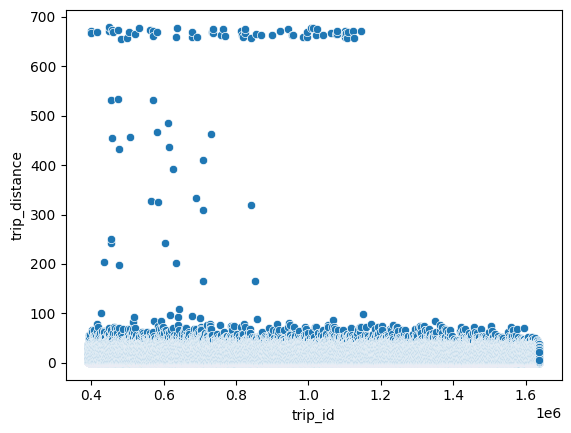

In [27]:
sns.scatterplot(y=df_orders['trip_distance'],x=df_orders['trip_id'])

Lets get trip origin locations count

In [68]:
trip_origin_count=df_orders.groupby('trip_origin',as_index=False).agg(count=('trip_id', 'count')).sort_values(by="count",ascending=False).reset_index(drop=True)


In [70]:
lat = trip_origin_count["trip_origin"].apply(lambda x:x.split(',')[0])
long = trip_origin_count["trip_origin"].apply(lambda x:x.split(',')[1])

In [71]:
trip_origin_count['latitude'] = lat
trip_origin_count['longitude'] = long

In [73]:
trip_origin_count.drop(columns="trip_origin",inplace=True)

In [74]:
trip_origin_count

,count,latitude,longitude
0,888,6.6137933,3.357997
1,668,6.462727,3.55679
2,576,6.4293597,3.4334968
3,544,6.4286308,3.5155123
4,543,6.4431192,3.4814372
...,...,...,...
112137,1,6.5260501,3.2559224
112138,1,6.526047672150523,3.3670831858565697
112139,1,6.526045806791566,3.305304192583367
112140,1,6.5260454,3.3053774


In [77]:
trip_origin_count['longitude']=trip_origin_count['longitude'].astype('float')
trip_origin_count['latitude']=trip_origin_count['latitude'].astype('float')

In [78]:
import plotly.express as plx
fig = plx.scatter_mapbox(trip_origin_count.head(500),lat='latitude',lon='longitude',
                         hover_name='count',color='count',height=300,zoom=10, size='count', 
                         color_discrete_sequence=["fuchsia"])
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Lets get trip destination locatio count

In [28]:
trip_destn_count=df_orders.groupby('trip_destination',as_index=False).agg(count=('trip_id', 'count')).sort_values(by="count",ascending=False).reset_index(drop=True)


In [29]:
lat = trip_destn_count["trip_destination"].apply(lambda x:x.split(',')[0])
long = trip_destn_count["trip_destination"].apply(lambda x:x.split(',')[1])

In [30]:
trip_destn_count['latitude'] = lat
trip_destn_count['longitude'] = long

In [31]:
trip_destn_count.drop(columns="trip_destination",inplace=True)

In [32]:
trip_destn_count['longitude']=trip_destn_count['longitude'].astype('float')
trip_destn_count['latitude']=trip_destn_count['latitude'].astype('float')

In [33]:
trip_destn_count.head()

,count,latitude,longitude
0,844,6.456731,3.530940
1,794,6.448969,3.523179
2,735,6.497595,3.383098
3,732,6.583794,3.333552
4,727,6.452345,3.527539


In [67]:
# import plotly.express as plx
fig = plx.scatter_mapbox(trip_destn_count.head(500),lat='latitude',lon='longitude',
                         hover_name='count',color='count',height=300,zoom=10, size='count',
                         color_discrete_sequence=["fuchsia"])
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Drivers locations data

In [35]:
df_drivers = pd.read_csv('../data/driver_locations_during_request.csv')

In [36]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [37]:
df_drivers.isnull().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

drop created_at and updated_at columns as they have no data 

In [38]:
cols = ['created_at','updated_at']


In [39]:
df_drivers.drop(cols,inplace=True,axis=1)

In [40]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 71.3+ MB


Merge df_orders and df_drivers on their common column trip_id and order_id respectively

In [41]:
merge_df = df_drivers.merge(df_orders, how='inner', left_on='order_id',right_on="trip_id")
merge_df.head()

,id,order_id,driver_id,driver_action,lat,lng,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance,trip_duration
0,1,392001,243828,accepted,6.602207,3.270465,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319,3.0
1,2,392001,243588,rejected,6.592097,3.287445,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319,3.0
2,3,392001,243830,rejected,6.596133,3.281784,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319,3.0
3,4,392001,243539,rejected,6.596142,3.280526,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319,3.0
4,5,392001,171653,rejected,6.609232,3.288800,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319,3.0


In [42]:
merge_df.dtypes

id                           int64
order_id                     int64
driver_id                    int64
driver_action               object
lat                        float64
lng                        float64
trip_id                      int64
trip_origin                 object
trip_destination            object
trip_start_time     datetime64[ns]
trip_end_time       datetime64[ns]
trip_origin_lat             object
trip_origin_long            object
trip_destn_lat              object
trip_destn_long             object
trip_distance              float64
trip_duration              float64
dtype: object

In [43]:
UTIL = Helper()

In [44]:
def convert_to_numeric(df,cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col])
    return df

In [45]:
# convert object typee columns to numeric
cols = ['trip_origin_lat','trip_origin_long','trip_destn_lat','trip_destn_long'] 
merge_df = convert_to_numeric(merge_df,cols)

In [46]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1557740 entries, 0 to 1557739
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1557740 non-null  int64         
 1   order_id          1557740 non-null  int64         
 2   driver_id         1557740 non-null  int64         
 3   driver_action     1557740 non-null  object        
 4   lat               1557740 non-null  float64       
 5   lng               1557740 non-null  float64       
 6   trip_id           1557740 non-null  int64         
 7   trip_origin       1557740 non-null  object        
 8   trip_destination  1557740 non-null  object        
 9   trip_start_time   1557740 non-null  datetime64[ns]
 10  trip_end_time     1557740 non-null  datetime64[ns]
 11  trip_origin_lat   1557740 non-null  float64       
 12  trip_origin_long  1557740 non-null  float64       
 13  trip_destn_lat    1557740 non-null  float6

In [47]:
merge_df.drop(['trip_origin', 'trip_destination'], axis=1, inplace=True)

In [48]:
merge_df.isnull().sum()

id                  0
order_id            0
driver_id           0
driver_action       0
lat                 0
lng                 0
trip_id             0
trip_start_time     0
trip_end_time       0
trip_origin_lat     0
trip_origin_long    0
trip_destn_lat      0
trip_destn_long     0
trip_distance       0
trip_duration       0
dtype: int64

In [49]:
merge_df.tail()

,id,order_id,driver_id,driver_action,lat,lng,trip_id,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance,trip_duration
1557735,1557736,517948,243774,rejected,6.469036,3.566877,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0
1557736,1557737,517948,245447,rejected,6.425431,3.527358,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0
1557737,1557738,517948,239866,rejected,6.440013,3.525378,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0
1557738,1557739,517948,243774,rejected,6.469036,3.566877,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0
1557739,1557740,517948,244170,rejected,6.469390,3.572079,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0


In [50]:
merge_df['trip_duration'].max()

37236.0

Lets get speed information

In [51]:
merge_df['speed(kmph)'] = merge_df['trip_distance']/(merge_df['trip_duration']/60) #per 60 because tip_duration is in minutes 

In [52]:
merge_df.head()

,id,order_id,driver_id,driver_action,lat,lng,trip_id,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance,trip_duration,speed(kmph)
0,1,392001,243828,accepted,6.602207,3.270465,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.0,419.686381
1,2,392001,243588,rejected,6.592097,3.287445,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.0,419.686381
2,3,392001,243830,rejected,6.596133,3.281784,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.0,419.686381
3,4,392001,243539,rejected,6.596142,3.280526,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.0,419.686381
4,5,392001,171653,rejected,6.609232,3.288800,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.0,419.686381


In [53]:
# extract year, month and day of week
merge_df['year'] = pd.DatetimeIndex(merge_df['trip_start_time']).year
merge_df['month'] = pd.DatetimeIndex(merge_df['trip_start_time']).month
merge_df['day_of_week'] = merge_df['trip_start_time'].dt.day_name()
# merge_df.month = pd.to_datetime(merge_df.month)
merge_df.head()

,id,order_id,driver_id,driver_action,lat,lng,trip_id,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance,trip_duration,speed(kmph),year,month,day_of_week
0,1,392001,243828,accepted,6.602207,3.270465,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.0,419.686381,2021,7,Thursday
1,2,392001,243588,rejected,6.592097,3.287445,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.0,419.686381,2021,7,Thursday
2,3,392001,243830,rejected,6.596133,3.281784,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.0,419.686381,2021,7,Thursday
3,4,392001,243539,rejected,6.596142,3.280526,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.0,419.686381,2021,7,Thursday
4,5,392001,171653,rejected,6.609232,3.288800,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.0,419.686381,2021,7,Thursday


In [54]:
merge_df.tail()

,id,order_id,driver_id,driver_action,lat,lng,trip_id,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance,trip_duration,speed(kmph),year,month,day_of_week
1557735,1557736,517948,243774,rejected,6.469036,3.566877,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.77231,2021,9,Friday
1557736,1557737,517948,245447,rejected,6.425431,3.527358,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.77231,2021,9,Friday
1557737,1557738,517948,239866,rejected,6.440013,3.525378,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.77231,2021,9,Friday
1557738,1557739,517948,243774,rejected,6.469036,3.566877,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.77231,2021,9,Friday
1557739,1557740,517948,244170,rejected,6.469390,3.572079,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.77231,2021,9,Friday


In [106]:
# merge_df[merge_df['speed(kmph)']=='NaN']

In [98]:
# # Get info for numerical columns
# UTIL.get_df_info(merge_df)
merge_df.describe()

,id,order_id,driver_id,lat,lng,trip_id,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance,trip_duration,speed(kmph),year,month
count,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06
mean,7.788705e+05,4.191833e+05,2.341505e+05,6.536031e+00,3.378877e+00,4.191833e+05,6.535614e+00,3.380084e+00,6.536080e+00,3.383548e+00,8.463774e+00,6.124710e+01,inf,2.021000e+03,6.999965e+00
std,4.496809e+05,1.444531e+04,2.270475e+04,5.998150e-02,5.333432e-02,1.444531e+04,6.029098e-02,5.278871e-02,7.311811e-02,7.487489e-02,6.336044e+00,1.300194e+02,NaN,7.166160e-03,4.026087e-02
min,1.000000e+00,3.920010e+05,1.219810e+05,6.409333e+00,3.076561e+00,3.920010e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.638661e-02,0.000000e+00,1.819603e-02,2.021000e+03,1.000000e+00
25%,3.894358e+05,4.067650e+05,2.429970e+05,6.498694e+00,3.348810e+00,4.067650e+05,6.499041e+00,3.350304e+00,6.464907e+00,3.342753e+00,3.996194e+00,2.800000e+01,5.692161e+00,2.021000e+03,7.000000e+00
50%,7.788705e+05,4.216870e+05,2.435890e+05,6.544247e+00,3.363504e+00,4.216870e+05,6.537571e+00,3.368576e+00,6.536754e+00,3.369833e+00,6.895317e+00,4.300000e+01,9.294443e+00,2.021000e+03,7.000000e+00
75%,1.168305e+06,4.293130e+05,2.440560e+05,6.593276e+00,3.385177e+00,4.293130e+05,6.591357e+00,3.387219e+00,6.596440e+00,3.406349e+00,1.128124e+01,6.500000e+01,1.436468e+01,2.021000e+03,7.000000e+00
max,1.557740e+06,5.179480e+05,2.478770e+05,7.702536e+00,8.515414e+00,5.179480e+05,8.226835e+00,8.522293e+00,7.703160e+00,8.607887e+00,6.800808e+02,3.723600e+04,inf,2.022000e+03,9.000000e+00


In [99]:
UTIL.percent_missing(merge_df)

Total Percentage of Missing values: 0% 


In [57]:
# UTIL.check_outlier(merge_df)

/home/nhgirma/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


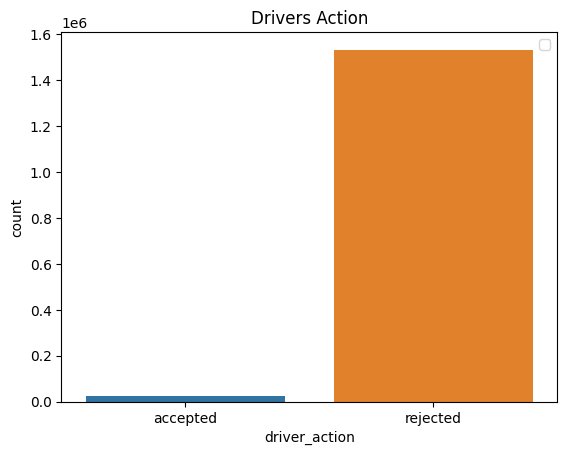

In [58]:
sns.countplot(merge_df['driver_action'])
plt.title('Drivers Action')
plt.legend()

Text(0.5, 1.0, 'Number Of Trips Per Day')

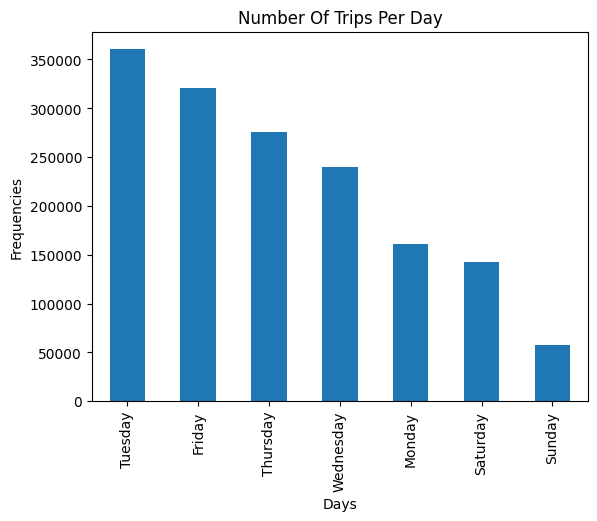

In [59]:
# plot number of trips on each day of the week
merge_df['day_of_week'].value_counts().plot(kind='bar')
plt.xlabel('Days')
plt.ylabel('Frequencies')
plt.title('Number Of Trips Per Day')

Text(0.5, 1.0, 'Number Of Trips Per Hour')

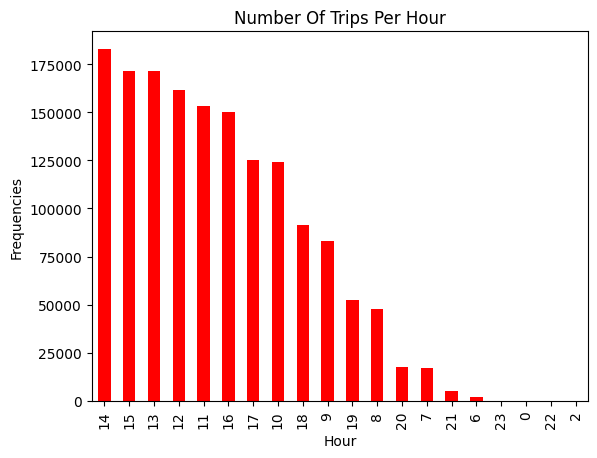

In [93]:
# plot number of trips per hour.
# N.B the time is given in UTC format
hours = merge_df['trip_start_time'].dt.hour.value_counts()
hours.plot(kind='bar',color='red')
plt.xlabel('Hour')
plt.ylabel('Frequencies')
plt.title('Number Of Trips Per Hour')

In [94]:
accepted_orders = merge_df[merge_df['driver_action'] == "accepted"]
rejected_orders = merge_df[merge_df['driver_action'] == "rejected"]

In [95]:
accepted_groupby_hour = accepted_orders.groupby('hour').count()
rejected_groupby_hour = rejected_orders.groupby('hour').count()

KeyError: 'hour'

Text(0.5, 1.0, 'Number Of Trips Per Month')

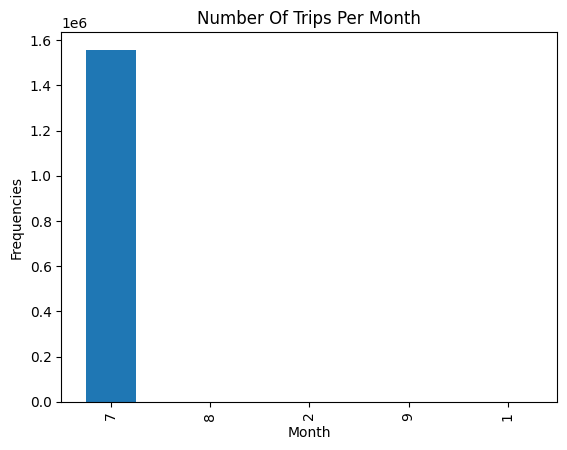

In [83]:
merge_df['month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequencies')
plt.title('Number Of Trips Per Month')

In [84]:
merge_df['month'].nunique()

5

In [89]:
merge_df['month'].unique()

array([7, 8, 2, 9, 1])

In [91]:
merge_df[merge_df['month']==9]

,id,order_id,driver_id,driver_action,lat,lng,trip_id,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance,trip_duration,speed(kmph),year,month,day_of_week
1557670,1557671,497721,243414,accepted,6.498164,3.359964,497721,2021-09-04 14:30:57,2021-09-04 15:18:38,6.482082,3.382865,6.463248,3.623976,26.751642,47.0,34.151033,2021,9,Saturday
1557671,1557672,497721,243781,rejected,6.498169,3.360082,497721,2021-09-04 14:30:57,2021-09-04 15:18:38,6.482082,3.382865,6.463248,3.623976,26.751642,47.0,34.151033,2021,9,Saturday
1557672,1557673,497721,245516,rejected,6.454286,3.388817,497721,2021-09-04 14:30:57,2021-09-04 15:18:38,6.482082,3.382865,6.463248,3.623976,26.751642,47.0,34.151033,2021,9,Saturday
1557677,1557678,517948,245874,accepted,6.464150,3.552330,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.772310,2021,9,Friday
1557678,1557679,517948,243832,rejected,6.443248,3.534282,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.772310,2021,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.772310,2021,9,Friday
1557736,1557737,517948,245447,rejected,6.425431,3.527358,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.772310,2021,9,Friday
1557737,1557738,517948,239866,rejected,6.440013,3.525378,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.772310,2021,9,Friday
1557738,1557739,517948,243774,rejected,6.469036,3.566877,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,4.772310,2021,9,Friday


In [61]:
# # ! pip install tornado
# ! pip install "holoviews[all]"
# ! pip install datashader

In [62]:
# import datashader as ds
# import colorcet as cc
# import holoviews as hv
# from holoviews.element.tiles import EsriImagery
# from holoviews.operation.datashader import datashade

In [79]:
# agg = ds.Canvas().points(merge_df, 'lat', 'lng')
# ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")

In [80]:
accepted = merge_df[merge_df['driver_action'] == "accepted"]
rejected = merge_df[merge_df['driver_action'] == "rejected"]

In [81]:
accepted_groupby_month = accepted.groupby('month').count()
rejected_groupby_month = rejected.groupby('month').count()

<AxesSubplot:xlabel='month'>

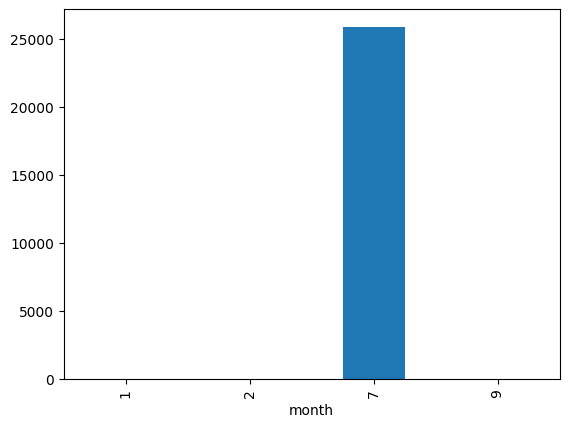

In [82]:
accepted_groupby_month['id'].plot(kind="bar")